In [1]:
import itertools as it
import os

from iterpop import iterpop as ip
from matplotlib import pyplot as plt
from nbmetalog import nbmetalog as nbm
import numpy as np
import pandas as pd
from scipy import stats as scipy_stats
import seaborn as sns
from teeplot import teeplot as tp


In [2]:
# prints metadata about notebook runtime
nbm.print_metadata()


context: ci
hostname: fv-az1429-274
interpreter: 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
nbcellexec: null
nbname: perfect-tree-phylometrics
nbpath: /home/runner/work/hstrat-evolutionary-inference/hstrat-evolutionary-inference/binder/gen3sis/perfect-tree-phylometrics.ipynb
revision: null
session: 00b2a4d2-c6db-41de-8391-ed7efc1d1713
timestamp: 2024-03-22T05:41:18Z00:00


IPython==8.22.2
keyname==0.5.2
yaml==6.0
iterpop==0.4.1
matplotlib==3.7.1
nbmetalog==0.2.6
numpy==1.21.6
pandas==1.3.5
scipy==1.7.3
seaborn==0.12.1
teeplot==0.5.0
re==2.2.1
comm==0.2.2
logging==0.5.1.2
psutil==5.9.8
zmq==24.0.1
json==2.0.9
ipykernel==6.29.3


In [3]:
df = pd.read_csv("https://osf.io/w3q9v/download")
dfdigest = np.bitwise_xor.reduce(
    pd.util.hash_pandas_object(df),
)
print("{:x}".format(dfdigest))
df


140617fc2d33af08


,a,epoch,mut_distn,treatment,seed,plain,phy.nex,_,colless_like_index,average_depth,...,variance_evolutionary_distinctiveness,spatial_plain,ecology,spatial_ecology,latest,resolution,subsampling_fraction,subsampling-fraction,trie-postprocess,ext
0,collapsed-phylogeny,0,default,plain,21,NaN,NaN,/mnt/home/mmore500/scratch/data/hstrat-evoluti...,1826.834415,21.344978,...,9.999499,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,collapsed-phylogeny,0,default,spatial_plain,114,NaN,NaN,/mnt/home/mmore500/scratch/data/hstrat-evoluti...,6233.179436,26.352574,...,5.002667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,collapsed-phylogeny,0,default,ecology,36,NaN,NaN,/mnt/home/mmore500/scratch/data/hstrat-evoluti...,2996.671817,22.634006,...,2.999362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,collapsed-phylogeny,0,default,ecology,37,NaN,NaN,/mnt/home/mmore500/scratch/data/hstrat-evoluti...,8880.303327,27.944778,...,2.169374,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,collapsed-phylogeny,0,default,spatial_plain,96,NaN,NaN,/mnt/home/mmore500/scratch/data/hstrat-evoluti...,6115.812979,24.076607,...,3.468459,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,reconstructed-tree,0,default,plain,5,NaN,NaN,/mnt/home/mmore500/scratch/data/hstrat-evoluti...,240.172886,7.657895,...,10.075515,NaN,NaN,NaN,NaN,3.0,1.0,1.0,naive,.csv.gz
596,reconstructed-tree,0,default,plain,30,NaN,NaN,/mnt/home/mmore500/scratch/data/hstrat-evoluti...,274.933010,8.883562,...,11.635637,NaN,NaN,NaN,NaN,33.0,1.0,1.0,naive,.csv.gz
597,reconstructed-tree,0,default,plain,16,NaN,NaN,/mnt/home/mmore500/scratch/data/hstrat-evoluti...,737.478160,11.417241,...,9.481669,NaN,NaN,NaN,NaN,33.0,1.0,1.0,naive,.csv.gz
598,reconstructed-tree,0,default,spatial_ecology,67,NaN,NaN,/mnt/home/mmore500/scratch/data/hstrat-evoluti...,31548.145509,15.225632,...,1.583985,NaN,NaN,NaN,NaN,3.0,1.0,1.0,naive,.csv.gz


In [4]:
# phylometrics whittled down to descriptive, non-redundant set
phylometrics = [
    #     'diversity',
    "colless_like_index",
    #     'average_depth',
    #     'average_origin_time',
    #     'average_origin_time_normalized',
    #     'max_depth',
    "mean_pairwise_distance",
    #     'mean_pairwise_distance_branch_only',
    #     'num_active',
    #     'num_ancestors',
    #     'num_outside',
    #     'num_roots',
    #     'num_taxa',
    #     'phylogenetic_diversity',
    "sum_distance",
    #     'sum_pairwise_distance',
    #     'sum_pairwise_distance_branch_only',
    #     'total_orgs',
    #     'tree_size',
    #     'variance_pairwise_distance',
    #     'variance_pairwise_distance_branch_only',
    #     'mrca_depth',
    #     'sackin_index',
    "mean_evolutionary_distinctiveness",
    #     'sum_evolutionary_distinctiveness',
    #     'variance_evolutionary_distinctiveness',
]


In [5]:
methodological_variables = [
    "resolution",
]


In [6]:
evolutionary_variables = [
    "num_islands",
    "num_niches",
    "tournament_size",
    "p_niche_invasion",
]


In [7]:
sensitivity_analysis_variables = [
    "epoch",
    "mut_distn",
]


In [8]:
fixed_variables = [
    "subsampling-fraction",  # only use 1.0
    "trie-postprocess",  # just use naive postprocessing for now
]


In [9]:
# ensure fixed variables
df = df[
    ((df["subsampling-fraction"] == 1.0) | df["subsampling-fraction"].isna())
    & ((df["trie-postprocess"] == "naive") | df["trie-postprocess"].isna())
].copy()

for fixed_variable in fixed_variables:
    assert len(df[fixed_variable].dropna().unique()) == 1

df


,a,epoch,mut_distn,treatment,seed,plain,phy.nex,_,colless_like_index,average_depth,...,variance_evolutionary_distinctiveness,spatial_plain,ecology,spatial_ecology,latest,resolution,subsampling_fraction,subsampling-fraction,trie-postprocess,ext
0,collapsed-phylogeny,0,default,plain,21,NaN,NaN,/mnt/home/mmore500/scratch/data/hstrat-evoluti...,1826.834415,21.344978,...,9.999499,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,collapsed-phylogeny,0,default,spatial_plain,114,NaN,NaN,/mnt/home/mmore500/scratch/data/hstrat-evoluti...,6233.179436,26.352574,...,5.002667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,collapsed-phylogeny,0,default,ecology,36,NaN,NaN,/mnt/home/mmore500/scratch/data/hstrat-evoluti...,2996.671817,22.634006,...,2.999362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,collapsed-phylogeny,0,default,ecology,37,NaN,NaN,/mnt/home/mmore500/scratch/data/hstrat-evoluti...,8880.303327,27.944778,...,2.169374,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,collapsed-phylogeny,0,default,spatial_plain,96,NaN,NaN,/mnt/home/mmore500/scratch/data/hstrat-evoluti...,6115.812979,24.076607,...,3.468459,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,reconstructed-tree,0,default,plain,5,NaN,NaN,/mnt/home/mmore500/scratch/data/hstrat-evoluti...,240.172886,7.657895,...,10.075515,NaN,NaN,NaN,NaN,3.0,1.0,1.0,naive,.csv.gz
596,reconstructed-tree,0,default,plain,30,NaN,NaN,/mnt/home/mmore500/scratch/data/hstrat-evoluti...,274.933010,8.883562,...,11.635637,NaN,NaN,NaN,NaN,33.0,1.0,1.0,naive,.csv.gz
597,reconstructed-tree,0,default,plain,16,NaN,NaN,/mnt/home/mmore500/scratch/data/hstrat-evoluti...,737.478160,11.417241,...,9.481669,NaN,NaN,NaN,NaN,33.0,1.0,1.0,naive,.csv.gz
598,reconstructed-tree,0,default,spatial_ecology,67,NaN,NaN,/mnt/home/mmore500/scratch/data/hstrat-evoluti...,31548.145509,15.225632,...,1.583985,NaN,NaN,NaN,NaN,3.0,1.0,1.0,naive,.csv.gz


In [10]:
# exclude extraneous variable values
df = df[(df["a"] == "collapsed-phylogeny")].copy()

df


,a,epoch,mut_distn,treatment,seed,plain,phy.nex,_,colless_like_index,average_depth,...,variance_evolutionary_distinctiveness,spatial_plain,ecology,spatial_ecology,latest,resolution,subsampling_fraction,subsampling-fraction,trie-postprocess,ext
0,collapsed-phylogeny,0,default,plain,21,NaN,NaN,/mnt/home/mmore500/scratch/data/hstrat-evoluti...,1826.834415,21.344978,...,9.999499,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,collapsed-phylogeny,0,default,spatial_plain,114,NaN,NaN,/mnt/home/mmore500/scratch/data/hstrat-evoluti...,6233.179436,26.352574,...,5.002667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,collapsed-phylogeny,0,default,ecology,36,NaN,NaN,/mnt/home/mmore500/scratch/data/hstrat-evoluti...,2996.671817,22.634006,...,2.999362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,collapsed-phylogeny,0,default,ecology,37,NaN,NaN,/mnt/home/mmore500/scratch/data/hstrat-evoluti...,8880.303327,27.944778,...,2.169374,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,collapsed-phylogeny,0,default,spatial_plain,96,NaN,NaN,/mnt/home/mmore500/scratch/data/hstrat-evoluti...,6115.812979,24.076607,...,3.468459,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,collapsed-phylogeny,0,default,spatial_ecology,74,NaN,NaN,/mnt/home/mmore500/scratch/data/hstrat-evoluti...,36699.980765,33.446545,...,1.218531,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
116,collapsed-phylogeny,0,default,spatial_plain,103,NaN,NaN,/mnt/home/mmore500/scratch/data/hstrat-evoluti...,10786.232528,28.006042,...,3.841204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117,collapsed-phylogeny,0,default,spatial_plain,112,NaN,NaN,/mnt/home/mmore500/scratch/data/hstrat-evoluti...,5847.911284,24.448541,...,4.043566,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
118,collapsed-phylogeny,0,default,spatial_ecology,89,NaN,NaN,/mnt/home/mmore500/scratch/data/hstrat-evoluti...,92353.368588,38.991665,...,1.242452,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df["a"].unique()


array(['collapsed-phylogeny'], dtype=object)

In [12]:
df["treatment"].unique()


array(['plain', 'spatial_plain', 'ecology', 'spatial_ecology'],
      dtype=object)

In [13]:
df["regime"] = df["treatment"].map(
    {
        "plain": "plain",
        "spatial_plain": "spatial structure",
        "ecology": "ecology",
        "spatial_ecology": "ecology, spatial",
    },
)
df["regime"].unique()


array(['plain', 'spatial structure', 'ecology', 'ecology, spatial'],
      dtype=object)

In [14]:
df[df["a"] == "collapsed-phylogeny"]["regime"].unique()


array(['plain', 'spatial structure', 'ecology', 'ecology, spatial'],
      dtype=object)

# Phylometrics by Regime, Perfect Data


In [15]:
melted_df = df[(df["a"] == "collapsed-phylogeny")].melt(
    id_vars=(
        # evolutionary_variables
        # methodological_variables
        sensitivity_analysis_variables
        + ["regime"]
    ),
    value_vars=phylometrics,
)
melted_df["phylometric"] = melted_df["variable"]
melted_df


,epoch,mut_distn,regime,variable,value,phylometric
0,0,default,plain,colless_like_index,1826.834415,colless_like_index
1,0,default,spatial structure,colless_like_index,6233.179436,colless_like_index
2,0,default,ecology,colless_like_index,2996.671817,colless_like_index
3,0,default,ecology,colless_like_index,8880.303327,colless_like_index
4,0,default,spatial structure,colless_like_index,6115.812979,colless_like_index
...,...,...,...,...,...,...
475,0,default,"ecology, spatial",mean_evolutionary_distinctiveness,2.041818,mean_evolutionary_distinctiveness
476,0,default,spatial structure,mean_evolutionary_distinctiveness,4.904330,mean_evolutionary_distinctiveness
477,0,default,spatial structure,mean_evolutionary_distinctiveness,4.969278,mean_evolutionary_distinctiveness
478,0,default,"ecology, spatial",mean_evolutionary_distinctiveness,2.069693,mean_evolutionary_distinctiveness


teeplots/./col=phylometric+epoch=0+mut_distn=default+viz=barplot+x=value+y=regime+ext=.pdf


teeplots/./col=phylometric+epoch=0+mut_distn=default+viz=barplot+x=value+y=regime+ext=.png


teeplots/./col=phylometric+epoch=0+mut_distn=default+viz=boxplot+x=value+y=regime+ext=.pdf


teeplots/./col=phylometric+epoch=0+mut_distn=default+viz=boxplot+x=value+y=regime+ext=.png


teeplots/./col=phylometric+epoch=0+mut_distn=default+viz=violinplot+x=value+y=regime+ext=.pdf


teeplots/./col=phylometric+epoch=0+mut_distn=default+viz=violinplot+x=value+y=regime+ext=.png


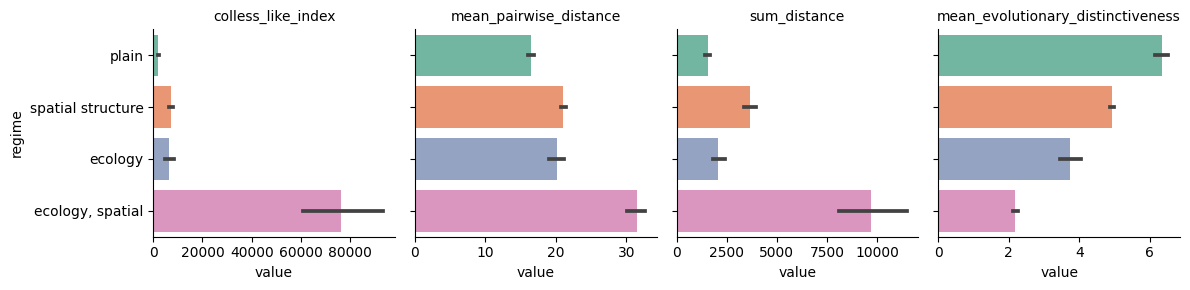

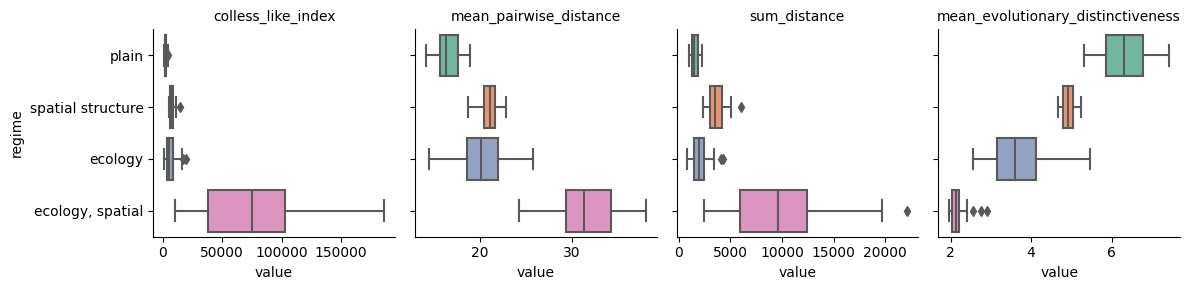

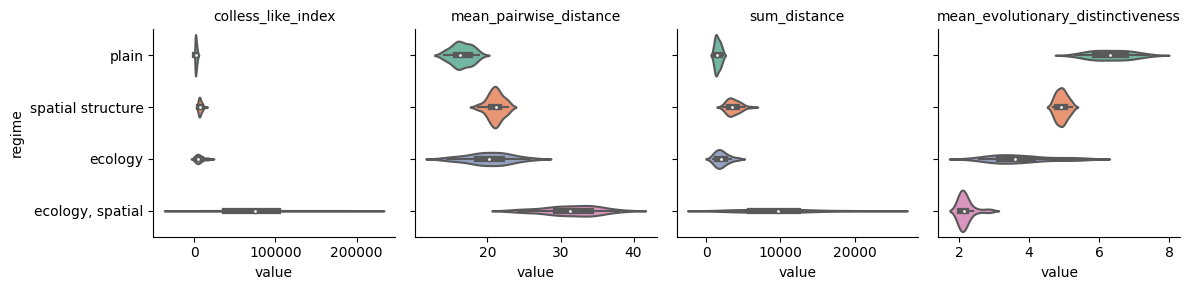

In [16]:
def make_do_plot(plotter):
    def do_plot(data, col, x, y):
        g = sns.FacetGrid(
            data,
            col=col,
            sharex=False,
        ).set_titles(template="{col_name}")
        g.map(
            plotter,
            x,
            y,
            order=[
                "plain",
                "spatial structure",
                "ecology",
                "ecology, spatial",
            ],
            palette=sns.color_palette("Set2", 4),
        )

    return do_plot


for viz, (group, group_df) in it.product(
    [
        sns.barplot,
        sns.boxplot,
        sns.violinplot,
    ],
    melted_df.groupby(sensitivity_analysis_variables),
):
    do_plot = make_do_plot(viz)
    do_plot.__name__ = viz.__name__
    tp.tee(
        do_plot,
        data=group_df,
        col="phylometric",
        x="value",
        y="regime",
        teeplot_outattrs=dict(
            zip(sensitivity_analysis_variables, group),
        ),
    )


# regime heatmap signatures


teeplots/./epoch=0+mut_distn=default+viz=heatmap+x=regime+y=phylometric+ext=.pdf
teeplots/./epoch=0+mut_distn=default+viz=heatmap+x=regime+y=phylometric+ext=.png


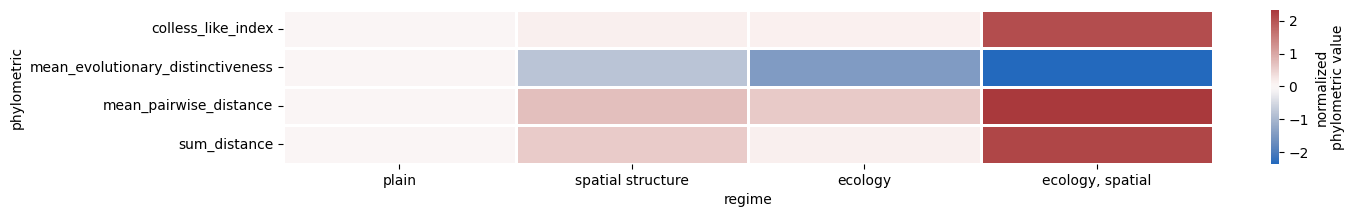

In [17]:
for (group, group_df) in df[
    df["regime"].isin(
        [
            "plain",
            "spatial structure",
            "ecology",
            "ecology, spatial",
        ],
    )
].groupby(sensitivity_analysis_variables):

    data = (
        group_df[(group_df["a"] == "collapsed-phylogeny")]
        .copy()
        .dropna(subset=["regime"])
    )

    data = data.groupby("regime").mean()

    plain_means = data.loc["plain"]
    plain_stds = data.std()

    # normalize to plain
    for phylometric in phylometrics:
        data[phylometric] = (
            data[phylometric] - plain_means[phylometric]
        ) / plain_stds[phylometric]

    data = data.reset_index(drop=False)
    data

    melted_df = data.melt(
        id_vars=["regime"],
        value_vars=phylometrics,
    )
    melted_df["phylometric"] = melted_df["variable"]
    melted_df

    fig, ax = plt.subplots(figsize=(15, 2))

    matrix = melted_df.pivot(
        index="phylometric",
        columns="regime",
        values="value",
    )
    matrix = matrix[
        sorted(
            matrix.columns,
            key=[
                "plain",
                "spatial structure",
                "ecology",
                "ecology, spatial",
            ].index,
        )
    ]

    tp.tee(
        sns.heatmap,
        matrix,
        linewidths=2,
        cmap=sns.color_palette("vlag", as_cmap=True),
        center=0,
        cbar_kws={"label": "normalized\nphylometric value"},
        teeplot_outattrs={
            **dict(
                zip(sensitivity_analysis_variables, group),
            ),
            **{
                "x": "regime",
                "y": "phylometric",
            },
        },
    )


# stats: kruskal-wallis


In [18]:
records = []
for phylometric in phylometrics:
    for group, group_df in df.groupby(
        sensitivity_analysis_variables, as_index=False
    ):
        kw_result, n = scipy_stats.kruskal(
            *(
                quality_series
                for quality, quality_series in group_df.groupby(["regime"])[
                    phylometric
                ]
            )
        ), ip.pophomogeneous(group_df.groupby(["regime"]).count()["a"])
        records.append(
            {
                **{
                    "n": n,
                    "N": len([*group_df.groupby(["regime"])]),
                    "phylometric": phylometric,
                },
                **dict(zip(["statistic", "p"], kw_result)),
                **dict(zip(sensitivity_analysis_variables, group)),
            }
        )

with pd.option_context("display.max_colwidth", None, "display.max_rows", None):
    out_df = (
        pd.DataFrame.from_records(records)
        .sort_values(
            sensitivity_analysis_variables,
        )
        .reset_index(drop=True)
    )
    display(out_df)
    os.makedirs("outdata", exist_ok=True)
    out_df.to_csv(
        "outdata/a=phylostatistics-comparison-between-regimes-kwallis+ext=.csv",
        index=False,
    )


,n,N,phylometric,statistic,p,epoch,mut_distn
0,30,4,colless_like_index,92.555096,6.189776e-20,0,default
1,30,4,mean_pairwise_distance,93.066336,4.806531e-20,0,default
2,30,4,sum_distance,90.526281,1.688557e-19,0,default
3,30,4,mean_evolutionary_distinctiveness,105.603306,9.690986e-23,0,default


# stats: wilcoxon all pairs


In [19]:
records = []
for phylometric in phylometrics:
    for group, group_df in df.groupby(
        sensitivity_analysis_variables, as_index=False
    ):
        for regime1, regime2 in it.combinations(
            group_df["regime"].unique(), 2
        ):
            kw_result, n = scipy_stats.wilcoxon(
                group_df[group_df["regime"] == regime1][phylometric],
                group_df[group_df["regime"] == regime2][phylometric],
            ), ip.pophomogeneous(group_df.groupby(["regime"]).count()["a"])
            records.append(
                {
                    **{
                        "regime1": regime1,
                        "regime2": regime2,
                        "n": n,
                        "phylometric": phylometric,
                    },
                    **dict(zip(["statistic", "p"], kw_result)),
                    **dict(zip(sensitivity_analysis_variables, group)),
                }
            )

with pd.option_context("display.max_colwidth", None, "display.max_rows", None):
    out_df = (
        pd.DataFrame.from_records(records)
        .sort_values(
            [*sensitivity_analysis_variables, "regime1", "regime2"],
        )
        .reset_index(drop=True)
    )
    display(out_df)
    os.makedirs("outdata", exist_ok=True)
    out_df.to_csv(
        "outdata/a=phylostatistics-comparison-between-regimes-allpairs-wilcox+ext=.csv",
        index=False,
    )


,regime1,regime2,n,phylometric,statistic,p,epoch,mut_distn
0,ecology,"ecology, spatial",30,colless_like_index,0.0,0.000002,0,default
1,ecology,"ecology, spatial",30,mean_pairwise_distance,0.0,0.000002,0,default
2,ecology,"ecology, spatial",30,sum_distance,1.0,0.000002,0,default
3,ecology,"ecology, spatial",30,mean_evolutionary_distinctiveness,0.0,0.000002,0,default
4,plain,ecology,30,colless_like_index,13.0,0.000006,0,default
5,plain,ecology,30,mean_pairwise_distance,13.0,0.000006,0,default
6,plain,ecology,30,sum_distance,86.0,0.002585,0,default
7,plain,ecology,30,mean_evolutionary_distinctiveness,0.0,0.000002,0,default
8,plain,"ecology, spatial",30,colless_like_index,0.0,0.000002,0,default
9,plain,"ecology, spatial",30,mean_pairwise_distance,0.0,0.000002,0,default
